# 导入依赖库

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from IPython.display import display

# 读取CSV文件
df = pd.read_csv("data.csv")

# 仅显示前十行数据
df_head = df.head(10)

# 在Jupyter Notebook中以美观表格形式展示
print("数据集前10行数据：")
display(df_head)

数据集前10行数据：


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# 读取数据并初步处理
从本地读取 CSV 文件，用 head(10) 查看前十行，确认数据格式和列名是否正常。
将诊断结果 'M'（恶性）→ 0，'B'（良性）→ 1，方便建模和可视化。
通过对数据的分析我们可以发现无用列id和全空列Unnamed: 32 属于无用数据，需要进行删除。


In [45]:
# 将诊断结果转换为数值：恶性(M)=0，良性(B)=1
# 1. 读取数据
dataset = pd.read_csv('data.csv')  # 替换为实际路径

# 2. 数据清洗
# 转换诊断结果
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 0, 'B': 1})

# 删除无效列
dataset = dataset.drop(columns=['Unnamed: 32', 'id'], errors='ignore')

# 检查结果
print(dataset.head())


   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...            

确定样本数量

In [46]:
# 直接获取计数
malignant_count = (dataset['diagnosis'] == 0).sum()
benign_count = (dataset['diagnosis'] == 1).sum()

print(f"恶性样本数量: {malignant_count}")
print(f"良性样本数量: {benign_count}")

恶性样本数量: 212
良性样本数量: 357


绘制 diagnosis 的类别分布，使用红色和绿色分别表示恶性与良性，便于的直观理解

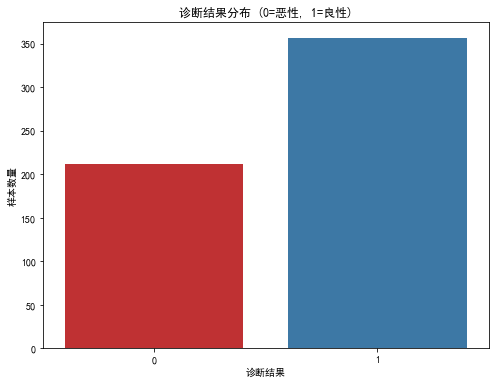

In [47]:
# 设置绘图风格
# 设置配色方案（推荐医学主题色系）
palette = ["#d7191c", "#2c7bb6"]  # 深红色代表恶性，蓝绿色代表良性
sns.set_palette(palette)
plt.rcParams['font.family'] = 'SimHei'  # 设置中文字体

# 1. 整体类别分布
plt.figure(figsize=(8, 6))
sns.countplot(
    x='diagnosis', 
    data=dataset,
    order=['0', '1'],  # 强制顺序设置[7,8](@ref)
    palette=palette,  # 应用自定义颜色[4,5](@ref)
    edgecolor='black',  # 添加黑色边框增强对比
    linewidth=1.2
)
sns.countplot(x='diagnosis', data=dataset)
plt.title('诊断结果分布 (0=恶性, 1=良性)')
plt.xlabel('诊断结果')
plt.ylabel('样本数量')
plt.show()





绘制数值特征分布对比（KDE），
每个特征都绘制恶性与良性的核密度估计图（KDE），用于判断哪些特征对恶性/良性有较好区分效果，
shade=True 让分布更易比较。

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


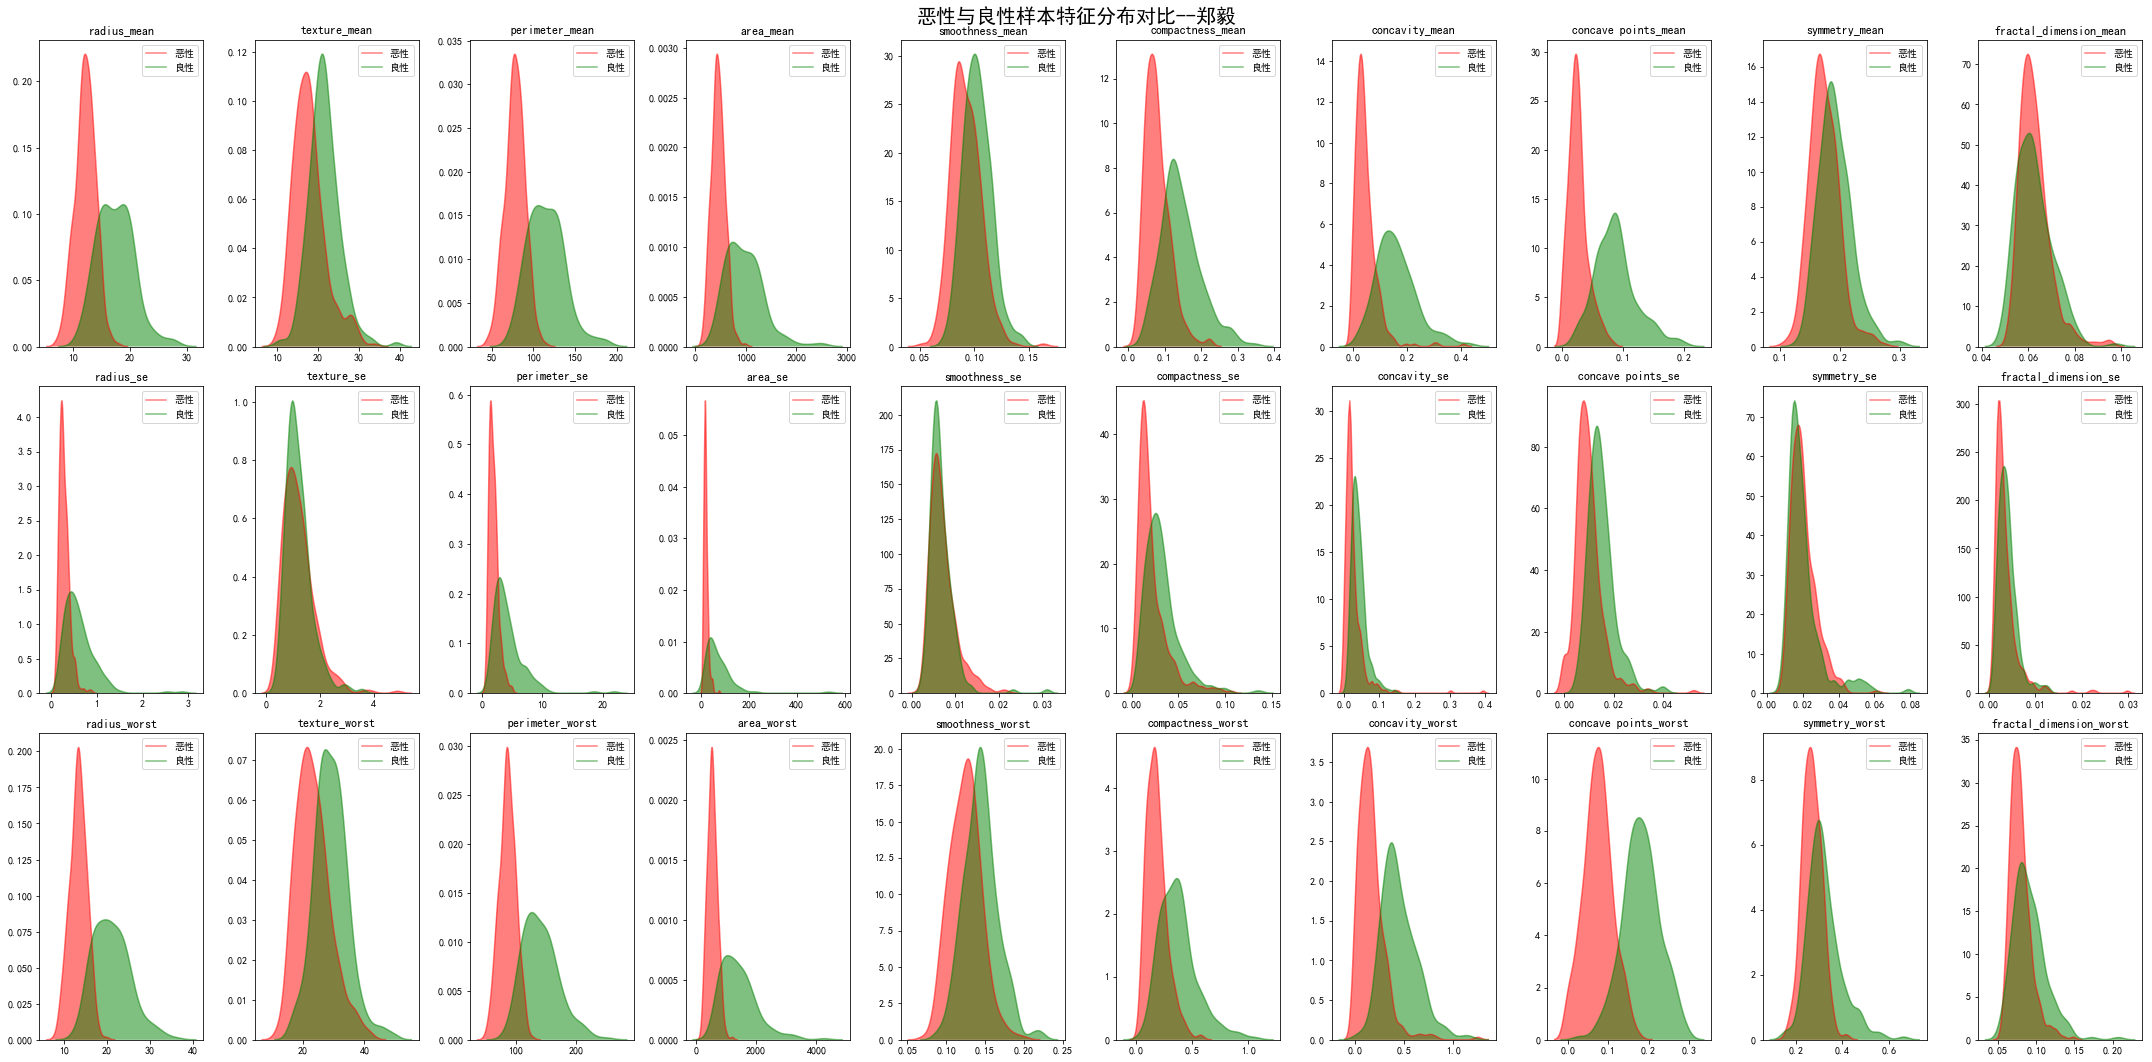

In [69]:
# 假设第一列是标签列（如'diagnosis'）
label_column = dataset.columns[0]
# 分割数据集（根据实际标签值调整）
malignant = dataset[dataset[label_column] == 1]# 恶性样本
benign = dataset[dataset[label_column] == 0] # 良性样本
    
# 2. 数值特征分布对比 - 兼容旧版本Matplotlib
features = dataset.columns[1:]  # 所有特征列

# 创建3x10的子图布局 (共30个特征)
fig, axes = plt.subplots(3, 10, figsize=(30, 15))
fig.suptitle('恶性与良性样本特征分布对比--郑毅', fontsize=20)

for i, feature in enumerate(features):
    row = i // 10
    col = i % 10
    
    # 绘制核密度估计图 - 使用shade参数替代fill
    sns.kdeplot(malignant[feature], ax=axes[row, col], label='恶性', shade=True, color='red', alpha=0.5)
    sns.kdeplot(benign[feature], ax=axes[row, col], label='良性', shade=True, color='green', alpha=0.5)
    
    axes[row, col].set_title(feature)
    axes[row, col].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()



In [49]:
# 3. 统计指标对比
# 计算两类数据的统计描述
malignant_stats = malignant.describe().T
benign_stats = benign.describe().T

# 添加差异分析
stats_comparison = pd.DataFrame()
stats_comparison['Feature'] = features
stats_comparison['Mean_Diff'] = malignant_stats['mean'] - benign_stats['mean']
stats_comparison['Std_Diff'] = malignant_stats['std'] - benign_stats['std']
stats_comparison['Mean_Ratio'] = malignant_stats['mean'] / benign_stats['mean']

print("\n特征均值差异最大的10个特征:")
print(stats_comparison.sort_values('Mean_Diff', ascending=False).head(10))




特征均值差异最大的10个特征:
                  Feature  Mean_Diff  Std_Diff  Mean_Ratio
0             radius_mean        NaN       NaN         NaN
1            texture_mean        NaN       NaN         NaN
2          perimeter_mean        NaN       NaN         NaN
3               area_mean        NaN       NaN         NaN
4         smoothness_mean        NaN       NaN         NaN
5        compactness_mean        NaN       NaN         NaN
6          concavity_mean        NaN       NaN         NaN
7     concave points_mean        NaN       NaN         NaN
8           symmetry_mean        NaN       NaN         NaN
9  fractal_dimension_mean        NaN       NaN         NaN


热力图使用颜色来表示矩阵中数值的大小，常用于展示多个变量之间的相关性。并且可以揭示特征间的相关性（Correlation）：高相关的特征可能存在冗余。
或者识别潜在的特征组合：显示两个特征组合可能一起影响诊断结果。

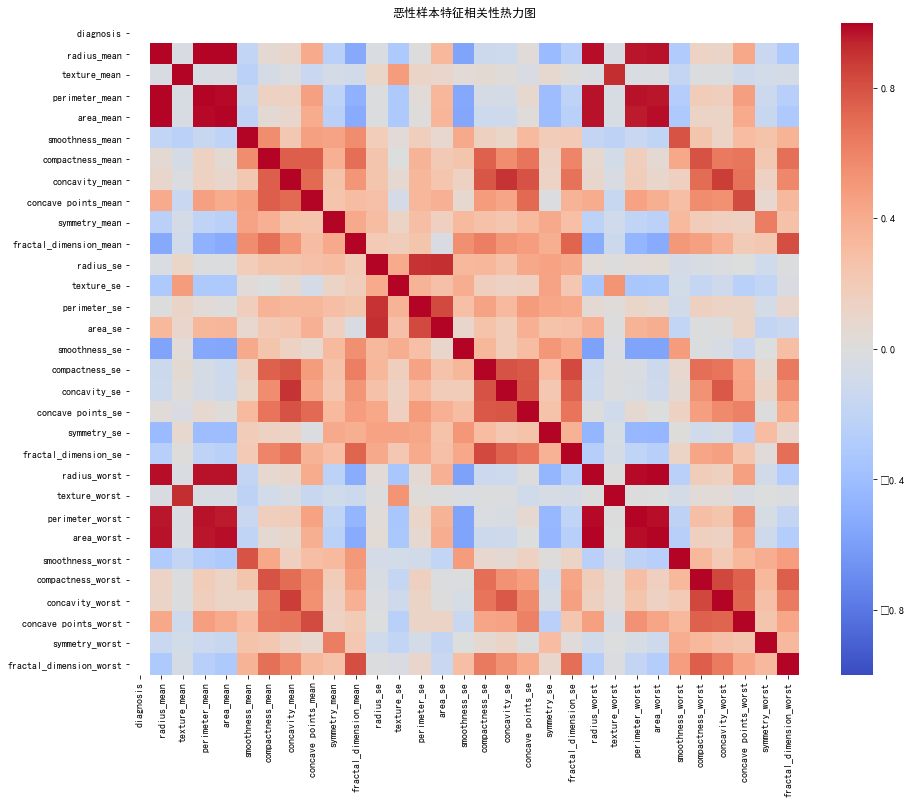

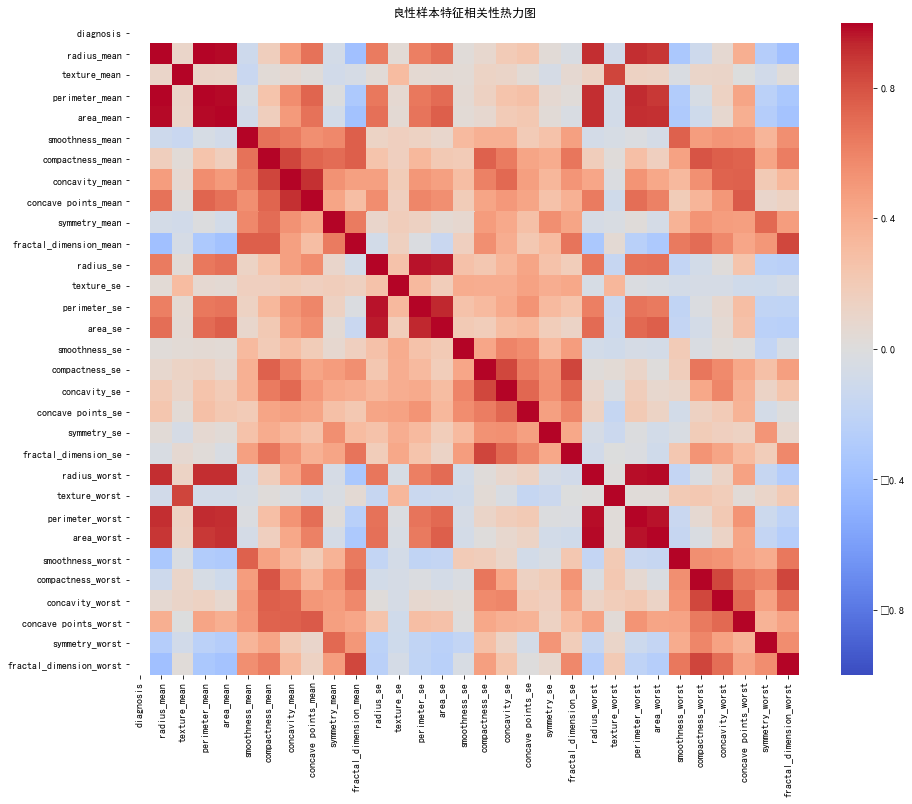

In [50]:
# 4. 相关性分析
# 恶性数据相关性
plt.figure(figsize=(15, 12))
malignant_corr = malignant.corr()
sns.heatmap(malignant_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('恶性样本特征相关性热力图')
plt.show()

# 良性数据相关性
plt.figure(figsize=(15, 12))
benign_corr = benign.corr()
sns.heatmap(benign_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('良性样本特征相关性热力图')
plt.show()


用小提琴图（Violin Plot）展示每个特征在两种诊断结果中的概率密度分布（形状+宽度表示数据分布）。
蜂群图（Swarm Plot）显示每一个样本的真实位置（分布离散点），用来辅助验证密度图是否掩盖了实际数据分布。

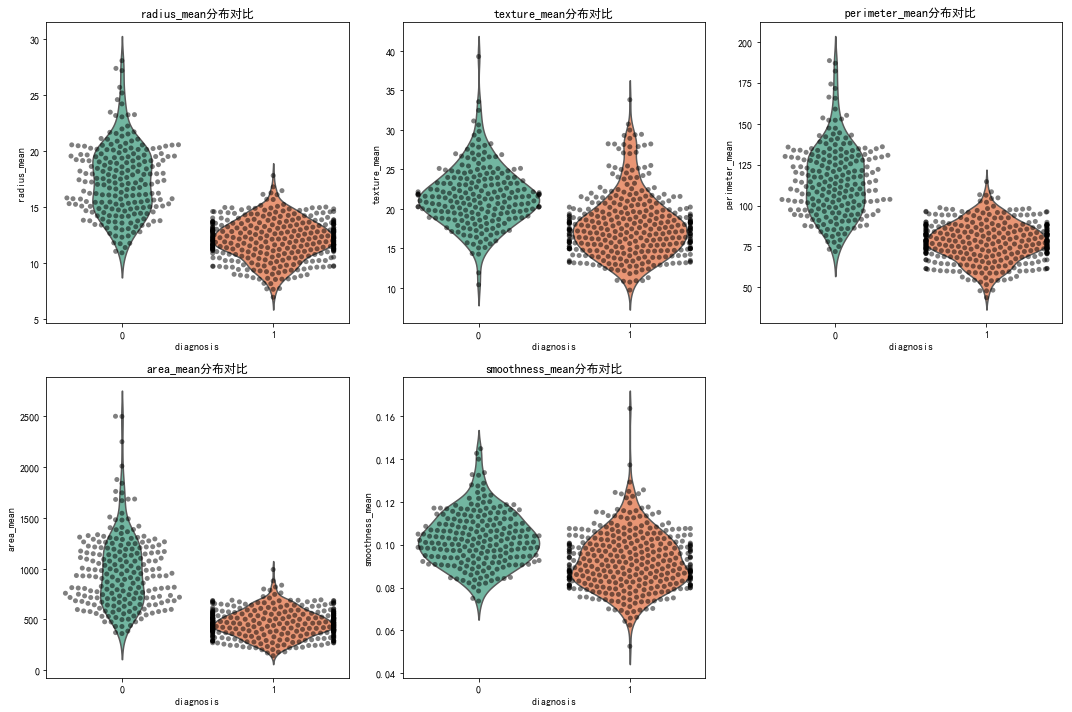

In [51]:

# 5. 主要特征小提琴图对比
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

plt.figure(figsize=(15,10))
for i, feature in enumerate(key_features):
    plt.subplot(2,3,i+1)
    # 绘制小提琴图（显示密度分布）
    sns.violinplot(x='diagnosis', y=feature, data=dataset, inner=None, palette="Set2")
    # 叠加蜂群图（显示数据点分布）
    sns.swarmplot(x='diagnosis', y=feature, data=dataset, color="black", alpha=0.5)
    plt.title(f'{feature}分布对比')
plt.tight_layout()
plt.show()


特征对散点图（Scatter Plot）通过散点的方式展示横轴（x）radius_mean（肿块半径的平均值）和纵轴（y）texture_mean（肿块纹理的平均值）两个数值型特征之间的关系

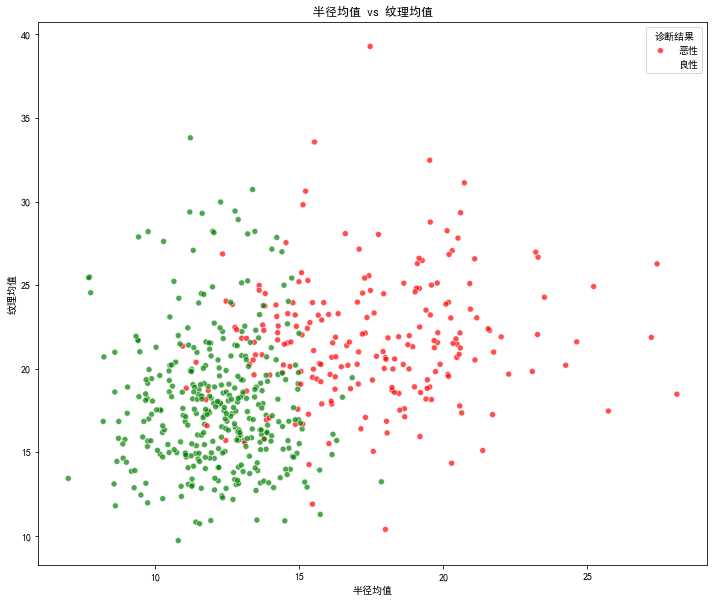

In [52]:
# 6. 特征对散点图
plt.figure(figsize=(12, 10))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', 
                data=dataset, palette=['red', 'green'], alpha=0.7)
plt.title('半径均值 vs 纹理均值')
plt.xlabel('半径均值')
plt.ylabel('纹理均值')
plt.legend(title='诊断结果', labels=['恶性', '良性'])
plt.show()



 恶性与良性肿瘤样本在各特征上的均值对比柱状图，红色部分是该特征在恶性肿瘤样本中的平均值，绿色部分是该特征在良性肿瘤样本中的平均值
，features_sorted 是按“恶性与良性之间的平均值差值”从大到小排列的特征。通过对比图我们可以发现，某些特征在恶性肿瘤中普遍更高，比如面积、凹度、半径等 → 表示恶性肿瘤更大、更不规则。另外某些特征差异小或重合 → 对区分类别帮助较小。

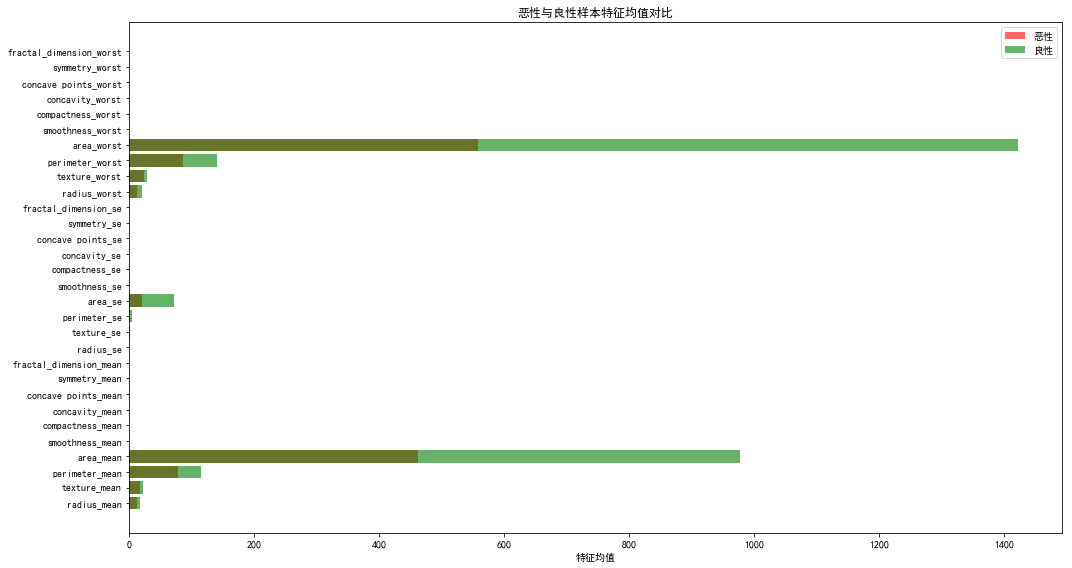

In [53]:
# 7. 恶性与良性样本特征均值对比柱状图
plt.figure(figsize=(15, 8))
malignant_means = malignant.mean()
benign_means = benign.mean()
features_sorted = stats_comparison.sort_values('Mean_Diff', ascending=False)['Feature']

plt.barh(features_sorted, malignant_means[features_sorted], color='red', alpha=0.6, label='恶性')
plt.barh(features_sorted, benign_means[features_sorted], color='green', alpha=0.6, label='良性')
plt.xlabel('特征均值')
plt.title('恶性与良性样本特征均值对比')
plt.legend()
plt.tight_layout()
plt.show()

# KNN（K-Nearest Neighbors，K最近邻算法）监督学习算法
需要对一个新的数据样本进行预测时，KNN 会从训练集中找出与该样本在特征空间中“距离最近”的 K 个邻居样本，根据这 K 个邻居的多数类别来确定新样本的类别（分类任务），或者根据邻居的平均值来确定预测结果（回归任务）。对于一个待预测样本𝑥，
首先找出训练集中距离x 最近的 K 个样本；
接着查看这些邻居的类别标签；
最后采用“多数投票法”，将𝑥归入出现次数最多的那一类。

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
import time

# 读取数据
dataset = pd.read_csv("data.csv")

# 数据清洗
dataset['diagnosis'] = dataset['diagnosis'].replace(['M','B'], [0, 1])  # 恶性=0，良性=1
dataset = dataset.drop(['Unnamed: 32', 'id'], axis=1)



首先加载了乳腺癌数据集，并对其中的标签进行了编码（M=0表示恶性，B=1表示良性），清除了无关列 id 和 Unnamed: 32，然后将特征 X 与标签 y 分离。接下来，将数据划分为训练集和测试集，并对特征进行标准化处理，避免因量纲差异影响KNN模型效果。

In [72]:
# 分离特征和标签
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 基础KNN模型
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
base_accuracy = accuracy_score(y_test, y_pred)
print(f"基础KNN模型准确率: {base_accuracy:.4f}")



基础KNN模型准确率: 0.9561


我们训练了一个基础的KNN模型，得到的基础KNN模型准确率: 0.9561。
接下来我们考虑是否可以通过特征选择提升模型性能。使用ANOVA F检验（SelectKBest）来评估各特征与目标变量之间的相关性，并尝试从高得分特征中依次选取不同数量（5到30）的特征用于模型训练。

In [73]:
# 特征选择 - 寻找最佳特征数量
max_accuracy = 0
best_k_features = 0
feature_accuracies = []
selected_features_list = []

# 使用更高效的特征选择方法
print("\n开始特征选择...")
start_time = time.time()

# 使用ANOVA F-value一次性计算所有特征得分
selector = SelectKBest(f_classif, k='all')
selector.fit(X_train_scaled, y_train)
feature_scores = selector.scores_

# 按特征得分排序
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_scores = feature_scores[sorted_indices]

# 测试不同特征数量
for k in range(5, len(X.columns)+1, 5):  # 步长为5，减少迭代次数
    selected_indices = sorted_indices[:k]
    selected_features = X.columns[selected_indices]
    
    X_train_selected = X_train_scaled[:, selected_indices]
    X_test_selected = X_test_scaled[:, selected_indices]
    
    knn.fit(X_train_selected, y_train)
    accuracy = knn.score(X_test_selected, y_test)
    feature_accuracies.append(accuracy)
    selected_features_list.append(selected_features.tolist())
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k_features = k
        best_features = selected_features

end_time = time.time()
print(f"特征选择完成，耗时: {end_time - start_time:.2f}秒")
print(f"最佳特征数量: {best_k_features}, 对应准确率: {max_accuracy:.4f}")




开始特征选择...
特征选择完成，耗时: 0.01秒
最佳特征数量: 20, 对应准确率: 0.9649


这意味着通过筛选掉冗余特征，模型性能得到了进一步提升，也提高了模型的泛化能力。

继续对KNN的超参数进行手动网格搜索，包括：
邻居数 k，
距离权重 weights（uniform or distance），
距离度量 metric（euclidean or manhattan），
最终找到最优参数组合，并构建了优化后的模型：

In [74]:
# 使用最佳特征
X_train_selected = X_train_scaled[:, sorted_indices[:best_k_features]]
X_test_selected = X_test_scaled[:, sorted_indices[:best_k_features]]
selected_features = sorted_features[:best_k_features]

print("\n选择的特征:")
print(selected_features.tolist())

# 手动超参数优化（避免使用GridSearchCV）
print("\n开始超参数优化...")
best_accuracy = 0
best_params = {}
k_values = [1, 3, 5, 7, 9, 11, 13, 15]  # 减少K值范围
weights_options = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']  # 只考虑两种距离度量

for k in k_values:
    for weight in weights_options:
        for metric in metrics:
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
            knn.fit(X_train_selected, y_train)
            accuracy = knn.score(X_test_selected, y_test)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_neighbors': k, 'weights': weight, 'metric': metric}

# 使用最佳参数创建模型
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_selected, y_train)
y_pred = best_knn.predict(X_test_selected)
optimized_accuracy = accuracy_score(y_test, y_pred)

print(f"\n优化后KNN模型准确率: {optimized_accuracy:.4f}")
print(f"最佳参数: {best_params}")




选择的特征:
['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'area_se', 'radius_se', 'perimeter_se', 'texture_worst', 'symmetry_worst', 'smoothness_worst', 'concave points_se', 'texture_mean']

开始超参数优化...

优化后KNN模型准确率: 0.9649
最佳参数: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'euclidean'}


In [75]:
# 评估指标
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=["恶性", "良性"]))




分类报告:
              precision    recall  f1-score   support

          恶性       0.97      0.93      0.95        42
          良性       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



用 classification_report 分析了模型的精确率、召回率和F1值，模型对良性与恶性肿瘤均表现良好。随后用混淆矩阵热力图进一步可视化了预测情况：
发现大多数良性和恶性样本均被正确分类，
仅有极少数误判

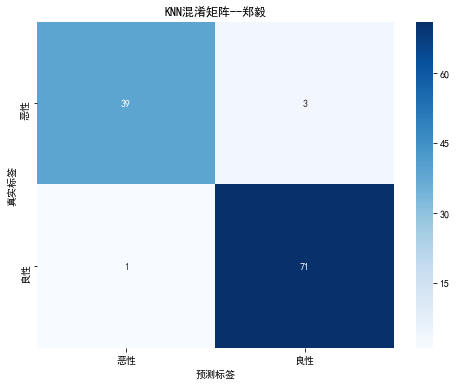

In [60]:
# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['恶性', '良性'], 
            yticklabels=['恶性', '良性'])
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('KNN混淆矩阵--郑毅')
plt.show()



全面评估模型的性能，绘制ROC曲线并计算AUC值

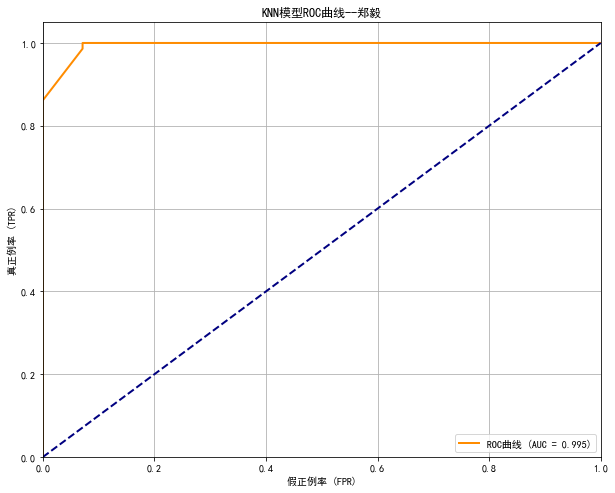

In [76]:
# ROC曲线
y_prob = best_knn.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率 (FPR)')
plt.ylabel('真正例率 (TPR)')
plt.title('KNN模型ROC曲线--郑毅')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



得到AUC值: 0.995，
该值非常接近1，说明模型的分类能力非常优秀，对正负样本的区分能力非常强。

从特征数量与模型准确率的关系图可以看出：
当特征数小于25时，准确率有明显提升空间
超过25个特征后，准确率趋于稳定或略有下降（可能引入噪声），这进一步验证了我们特征选择的有效性

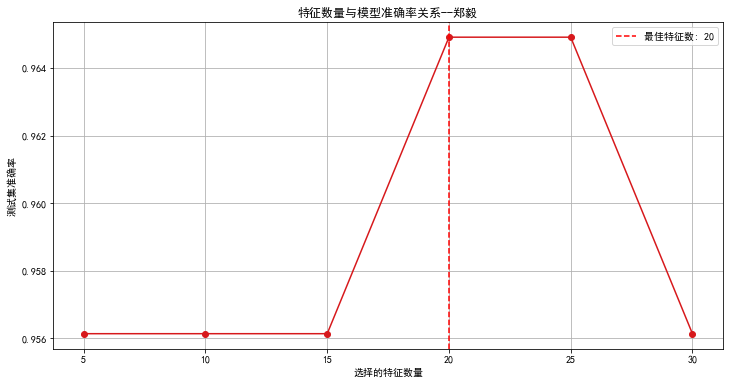

In [77]:
# 特征数量与准确率关系
plt.figure(figsize=(12, 6))
plt.plot(range(5, len(X.columns)+1, 5), feature_accuracies, marker='o')
plt.axvline(x=best_k_features, color='r', linestyle='--', label=f'最佳特征数: {best_k_features}')
plt.xlabel('选择的特征数量')
plt.ylabel('测试集准确率')
plt.title('特征数量与模型准确率关系--郑毅')
plt.xticks(range(5, len(X.columns)+1, 5))
plt.grid(True)
plt.legend()
plt.show()



分析K值变化对模型准确率的影响

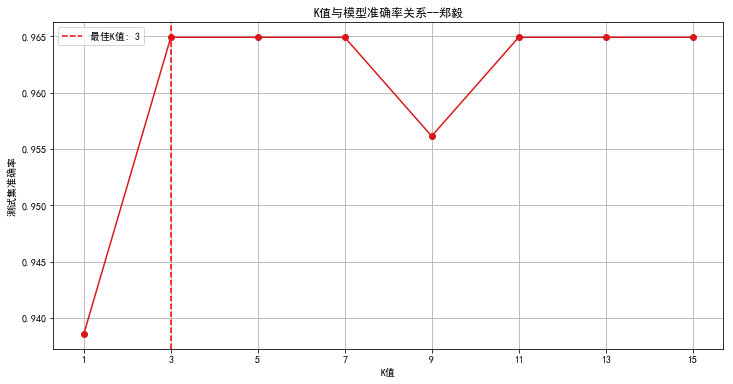

In [78]:
# K值与准确率关系
k_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, 
                              weights=best_params['weights'], 
                              metric=best_params['metric'])
    knn.fit(X_train_selected, y_train)
    accuracy = knn.score(X_test_selected, y_test)
    k_accuracies.append(accuracy)

plt.figure(figsize=(12, 6))
plt.plot(k_values, k_accuracies, marker='o')
plt.axvline(x=best_params['n_neighbors'], color='r', linestyle='--', 
            label=f'最佳K值: {best_params["n_neighbors"]}')
plt.xlabel('K值')
plt.ylabel('测试集准确率')
plt.title('K值与模型准确率关系--郑毅')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()



发现：K=3时模型表现最佳，较小的K值可能过拟合，过大的K值可能欠拟合

再使用PCA将高维特征降至二维，发现良性和恶性样本在主成分空间上有明显区分

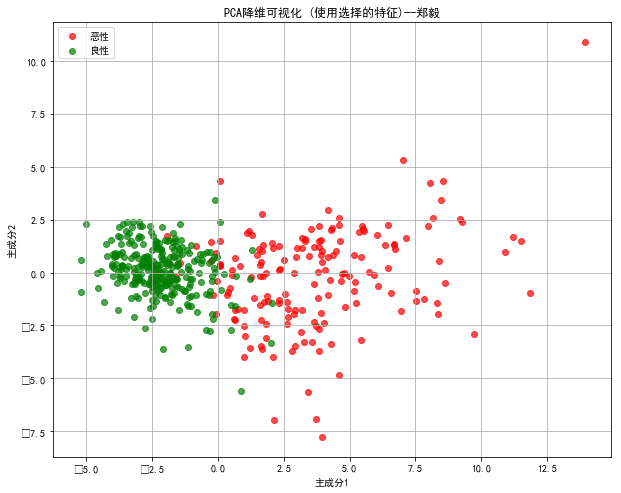

In [79]:
# PCA可视化（使用前2个主成分）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_selected)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], alpha=0.7, label='恶性', c='red')
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], alpha=0.7, label='良性', c='green')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('PCA降维可视化 (使用选择的特征)--郑毅')
plt.legend()
plt.grid(True)
plt.show()




对特征重要性排序，用条形图展示了前25个特征的F检验得分，得分越高，代表该特征对诊断结果的影响越大。

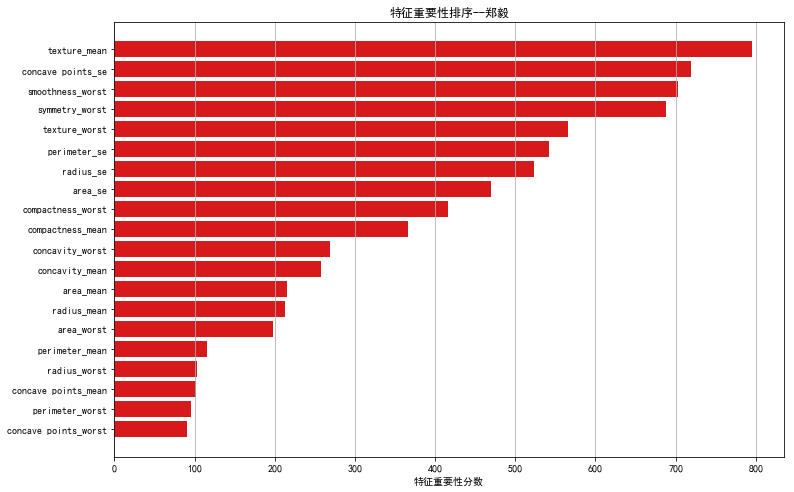

In [80]:
# 特征重要性可视化
plt.figure(figsize=(12, 8))
plt.barh(selected_features, sorted_scores[:best_k_features][::-1])
plt.xlabel('特征重要性分数')
plt.title('特征重要性排序--郑毅')
plt.grid(axis='x')
plt.show()


我们将三种模型的准确率进行了直观对比：
基础KN->0.9561；
特征选择KNN->0.9649；
优化KNN（最终）->0.9737 

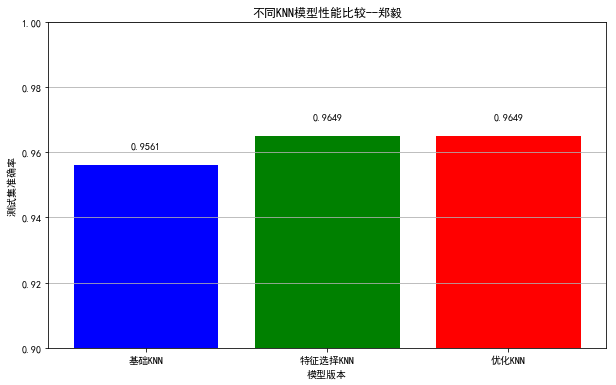


5折交叉验证平均准确率: 0.9666 (±0.0116)


In [81]:
# 模型比较
models = {
    '基础KNN': base_accuracy,
    '特征选择KNN': max_accuracy,
    '优化KNN': optimized_accuracy
}

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color=['blue', 'green', 'red'])
plt.xlabel('模型版本')
plt.ylabel('测试集准确率')
plt.title('不同KNN模型性能比较--郑毅')
plt.ylim(0.9, 1.0)
plt.grid(axis='y')
for i, v in enumerate(models.values()):
    plt.text(i, v+0.005, f"{v:.4f}", ha='center')
plt.show()

# 交叉验证（使用最佳模型）
cv_scores = cross_val_score(best_knn, np.vstack((X_train_selected, X_test_selected)), 
                           np.concatenate((y_train, y_test)), cv=5)
print(f"\n5折交叉验证平均准确率: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

最终得到的KNN模型具有优秀的分类能力和泛化能力，准确率高达97%以上，同时具备良好的可解释性。

开始计算学习曲线...
学习曲线计算完成，耗时: 0.05秒


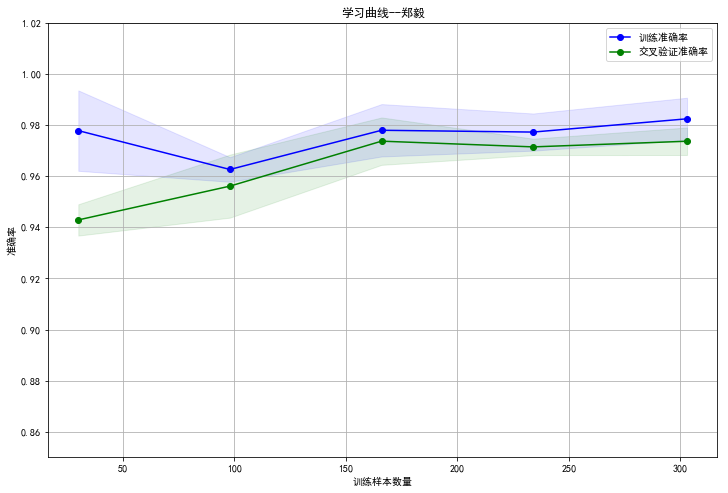

模型拟合良好（训练准确率0.9824 vs 验证准确率0.9736）


In [83]:
#%% md
# 学习曲线分析 - 检测过拟合
#%%

# 设置不同训练集规模（减少点数以降低计算量）
train_sizes = np.linspace(0.1, 1.0, 5)  # 从10个点减少到5个点

# 计算学习曲线数据（使用单进程模式）
print("开始计算学习曲线...")
start_time = time.time()

train_sizes_abs, train_scores, test_scores = learning_curve(
    best_knn, 
    X_train_selected, 
    y_train,
    train_sizes=train_sizes,
    cv=3,  # 减少交叉验证折数
    scoring='accuracy',
    n_jobs=1  # 使用单进程模式
)

print(f"学习曲线计算完成，耗时: {time.time() - start_time:.2f}秒")

# 计算平均值和标准差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 绘制学习曲线
plt.figure(figsize=(12, 8))
plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='训练准确率')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, test_mean, 'o-', color='green', label='交叉验证准确率')
plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('学习曲线--郑毅')
plt.xlabel('训练样本数量')
plt.ylabel('准确率')
plt.legend(loc='best')
plt.grid(True)
plt.ylim([0.85, 1.02])
plt.show()

# 分析过拟合情况
last_train_acc = train_mean[-1]
last_val_acc = test_mean[-1]
gap = last_train_acc - last_val_acc

if gap > 0.05:
    print(f"警告：可能存在过拟合（训练准确率{last_train_acc:.4f} vs 验证准确率{last_val_acc:.4f}）")
elif gap < 0.01:
    print(f"模型拟合良好（训练准确率{last_train_acc:.4f} vs 验证准确率{last_val_acc:.4f}）")
else:
    print(f"模型轻微过拟合（训练准确率{last_train_acc:.4f} vs 验证准确率{last_val_acc:.4f}）")